# Solving Differential Equations of Systems of Interactions

Differential equations are central in the mathematical treatment of the dynamics of biological systems. Now that we know how to write the set of differential equations that govern a certain system of interacting species (using differential form of Mass Action Law and the Mass Conservation), we will proceed now to integrate them and obtain an analytical solution and extract relevant information.

##  1. Irreversible First Order Reaction 

 We will start with the simplest example of one species  $X_1$ transforming into another $X_2$ with a kinetic constant $k_1$. The scheme of interactions is simply: 

$$ X_1 \overset{k_1}{\longrightarrow} X_2  \tag{1} $$ 

with initial concentrations $X_1(0)$ and $X_2(0)$ and stoichometric matrices

$$
A=\begin{bmatrix}
 1& 0\end{bmatrix} ;
B=\begin{bmatrix}
0 & 1  
\end{bmatrix} ; (B-A)^T= \begin{bmatrix}
 - 1\\ 1 \end{bmatrix} \tag{2}
$$
 in this particular case

$$
K=\begin{pmatrix}
 k\\ 
\end{pmatrix}
$$

and 

$$X^A=\begin{pmatrix}
X_1^1\cdot X_2^0
\end{pmatrix}
$$

so 

$$
\begin{align}
 \begin{bmatrix}
\frac{\mathrm{d} X_1}{\mathrm{d} t}\\ \frac{\mathrm{d} X_2}{\mathrm{d} t} \end{bmatrix}= \begin{bmatrix}
 - 1\\ 1 \end{bmatrix} \begin{bmatrix}
k \end{bmatrix}\begin{pmatrix}
X_1^1\cdot X_2^0
\end{pmatrix} = \begin{bmatrix}
 - 1\\ 1 \end{bmatrix} \begin{pmatrix}
k \cdot X_1
\end{pmatrix} = \begin{bmatrix}
 - k \cdot X_1\\ k \cdot X_1 \end{bmatrix} 
\end{align}
$$



The set of ODEs that define the system is

$$
\begin{align*}
   \frac{\mathrm{d} X_1}{\mathrm{d} t} &=  - k_1 X_1 \tag{3}\\
   \frac{\mathrm{d} X_2}{\mathrm{d} t} &=   k_1 X_1  \tag{4}\\
\end{align*}
$$

It is called a first order reaction because the rate is proportional to the first power of the concentration of one reactant. Taking eq. 2, we reorganize variables and integrate.

$$\begin{align*}
   \frac{\mathrm{d} X_1}{X_1} &=  - k_1 \mathrm{d}t \tag{5}\\
   \int  \frac{\mathrm{d} X_1}{X_1} &=  \int  - k_1 \mathrm{d}t \tag{6}\\
    \log(X_1(t)) &=  - k_1 t + C  \tag{7}\\
    X_1 (t)&=  e^{- k_1 t + C}  \tag{8}\\
    X_1 (t)&=  e^{- k_1 t}e^{C}  \tag{9}\\
\end{align*}$$

To calculate the integration constant, we use the intial condition at $t=0$.

$$\begin{align*}
    X_1 (0)&=  e^{- k_1 0} e^{C}  \tag{10}\\
    X_1 (0)&=   e^{C}  \tag{11}\\
\end{align*}$$
so the final differential equation for $X_1$ takes the form:

$$ X_1 (t)= X_1 (0) e^{- k_1 t}  \tag{12}$$

Let's use now the conservation of mass to obtain the equation for the reactant $X_2$. Based on this law, if $C \cdot (B-A)^T =0$, then $\sum_{i=1}^{r} C_i \cdot X_i = cte $, so for the case of two variables and one single irreversible reaction 

$$ \begin{align*}
C_1 \cdot X_1 + C_2 \cdot X_2 &= cte \tag{13}\\
\end{align*}$$

so
$$ \begin{align*}
C \cdot (B-A)^T &=0\\ 
\begin{pmatrix}C_1 & C_2\end{pmatrix} \begin{bmatrix}
 - 1\\ 1 \end{bmatrix}&=0\\
 -C_1 + C_2 &= 0\\
 C_1 &= C_2
\end{align*}$$
Therefore,

$$ \begin{align*}
C_1 \cdot X_1(t) + C_1 \cdot X_2(t) &= cte\\
\end{align*}$$

for any value of $C_1$, so taking $C_1=1$, we have 

$$X_1(t)+X_2(t)=cte $$.

This constant value has to be true also at $t=0$,

$$X_1(t)+X_2(t)= X_1(0)+X_2(0) = cte $$.

using this conservation of mass, we can also obtain the analytical solution for $X_2$:

$$ \begin{align*}
X_2 (t) &= X_1 (0) + X_2 (0) - X_1 (t) \\
X_2 (t) &= X_1 (0) + X_2 (0) - X_1 (0) e^{- k_1 t}  \\
X_2 (t) &=  X_2 (0) + X_1 (0) (1-e^{- k_1 t})  \tag{14}
\end{align*}$$

### Exercise: 
Use the solution for Irreversible First Order Reaction, write a computer program that consists on a function that takes as input the time of the reaction, a vector of initial concentrations of the species $X_i$ and the reaction rate $k$ and plots the time evolution of the variables $X_i(t)$. 

In [1]:
using Plots
gr()

Plots.GRBackend()

In [2]:
t=collect(0:0.1:10)
X₀ = [0.1,0.0]
k_1 = 1.;

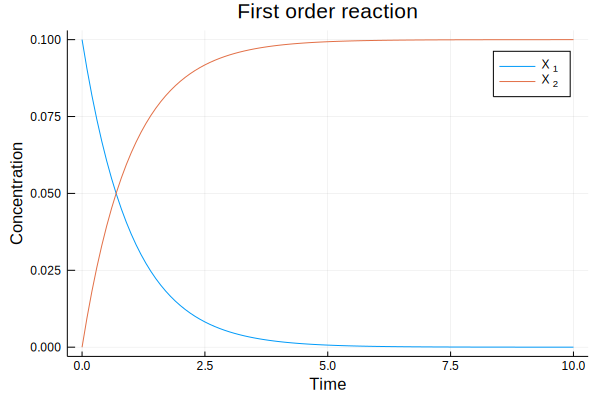

In [3]:
plot(t,t->X₀[1]*exp(-k_1*t),label="\\ X_1",seriestype=:line)
plot!(t,t->X₀[2]+X₀[1]*(1-exp(-k_1*t)),label="\\ X_2",seriestype=:line)
title!("First order reaction")
xaxis!("Time")
yaxis!("Concentration")

## 2. Reversible First Order Reaction

Another simple example that can be solved analytically is the reversible first order reaction :

$ X_1 \overset{k_1}{\underset{k_2}{\longleftrightarrow}} X_2  \tag{15} $


$$
A=\begin{bmatrix}
 1 & 0\\
 0 & 1 \end{bmatrix} ;
B=\begin{bmatrix}
0 & 1\\
 1 & 0  
\end{bmatrix} ; (B-A)^T= \begin{bmatrix}
-1 & 1\\
 1 & -1   \end{bmatrix} 
$$

 in this particular case

$$
K=\begin{pmatrix}
 k_1 & 0\\
 0 & k_2
\end{pmatrix}
$$


$$X^A=\begin{pmatrix}
X_1^1\cdot X_2^0\\
X_1^0\cdot X_2^1
\end{pmatrix} = \begin{pmatrix}
X_1\\
 X_2
\end{pmatrix}
$$

so 

$$
\begin{align}
 \begin{bmatrix}
\frac{\mathrm{d} X_1}{\mathrm{d} t}\\ \frac{\mathrm{d} X_2}{\mathrm{d} t} \end{bmatrix}= \begin{bmatrix}
-1 & 1\\
 1 & -1   \end{bmatrix} \begin{pmatrix}
 k_1 & 0\\
 0 & k_2
\end{pmatrix}\begin{pmatrix}
X_1\\
 X_2
\end{pmatrix}  =  \begin{bmatrix}
-1 & 1\\
 1 & -1   \end{bmatrix}\begin{pmatrix}
k_1 \cdot X_1\\
  k_2 \cdot X_2
\end{pmatrix} =   \begin{bmatrix}
- k_1 \cdot X_1 +  k_2 \cdot X_2\\
 k_1 \cdot X_1 -k_2 \cdot X_2   \end{bmatrix}
\end{align}
$$



The differential equations of the system can be written using the differential form of Mass Action Law as: 

$$\begin{align}
\frac{dX_1}{dt} = -k_1 \cdot X_1 +k_2 \cdot X_2 \tag{17}\\
\frac{dX_2}{dt} = k_1 \cdot X_1 - k_2 \cdot X_2 \tag{18}\\
\end{align}$$

The mass balance law is equivalent to the previous case (only $X_1$ and $X_2$ as reactants). We start by using mass balance to de-couple the two equations. For the first one we have:

$$\begin{align}
\frac{dX_1}{dt} = k_2\left( X_1(0)+X_2(0)-X_1\right)-k_1X_1 \tag{18}\\
\end{align}$$

which, when we rearrange terms becomes:
$$\frac{dX_1}{dt}+\left(k_2+k_1\right)X_1=k_2\left( X_1(0)+X_2(0)\right) \tag{19}$$

To solve this diferential equation, we need to calculate the integration factor, $e^{ \int p(x)dx }$, that allows us to put the first term of the equation as one diferentiation. In this case $p(x)=k_2+k1 $, so $e^{ \int (k_2+k1)dt }=e^{(k_2+k1)t}$. This way, when we multiply both terms in eq. 18 by the integrating factor, we obtain:

$$\frac{dX_1}{dt} e^{(k_2+k1)t} +\left(k_2+k_1\right) e^{(k_2+k1)t} X_1 = \left( X_1(0)+X_2(0)\right) k_2 e^{(k_2+k1)t} \tag{20}$$

The first term now is the derivative of $X_1 \cdot  e^{(k_2+k1)t}$ so we can reqwrite:

$$\frac{d(X_1 e^{(k_2+k1)t})}{dt} = \left( X_1(0)+X_2(0)\right) k_2 e^{(k_2+k1)t} \tag{21}$$

we move the `dt` to the right side we integrate 

$$ \int d(X_1 e^{(k_2+k1)t}) = \left( X_1(0)+X_2(0)\right) k_2 \int e^{(k_2+k1)t} dt \tag{22}$$

solving

$$ X_1 e^{(k_2+k1)t} = \frac{\left( X_1(0)+X_2(0)\right) k_2}{k_2+k1}  e^{(k_2+k1)t} + C \tag{23}$$

rearranging terms becomes

$$ X_1 (t) = \frac{\left( X_1(0)+X_2(0)\right) k_2}{k_2+k1} + C \cdot e^{-(k_2+k1)t} \tag{24}$$

to calculate the integration constant we use initial value of $X_1$

$$
\begin{align}
X_1 (0) &= \frac{\left( X_1(0)+X_2(0)\right) k_2}{k_2+k1} + C \cdot e^{-(k_2+k1)0} \tag{25}\\
X_1 (0) &=\frac{\left( X_1(0)+X_2(0)\right) k_2}{k_2+k1} + C \tag{26}\\
C&= X_1 (0) - \frac{\left( X_1(0)+X_2(0)\right) k_2}{k_2+k1} \tag{27}\\
C&= \frac{X_1 (0)(k_2 + k 1) - X_1(0) k_2 - X_2(0) k_2 }{k_2+k1}\tag{28} \\
C&= \frac{X_1 (0) k 1 - X_2(0) k_2 }{k_2+k1}\tag{29} \\
\end{align}$$


Therefore the full solutions for $X_1$ is:
$$\label{eq:aeq} X_1(t)=\frac{k_2\left ( X_1(0)+X_2(0) \right )}{k_1+k_2}+\frac{k_1 X_1(0)-k_2X_2(0) }{k_1+k_2}e^{-\left (k_1+k_2)\right )t} \tag{30}$$


In this case, the conservation of mass is exactly the same as the previous case of irreversible reaction, so:
$$X_1(t)+X_2(t)=X_1(0)+X_2(0) \tag{16} $$


and, using the conservation of mass, the solution for $X_2$ is
$$ 
\begin{align}
X_2(t)&=X_1(0)+X_2(0)-\frac{k_2\left ( X_1(0)+X_2(0) \right )}{k_1+k_2}-\frac{k_1 X_1(0)-k_2X_2(0) }{k_1+k_2}e^{-\left (k_1+k_2)\right )t} \tag{31}\\
X_2(t)&=\frac{(k_1+k_2)(X_1(0)+X_2(0))} {k_1+k_2}-\frac{k_2\left ( X_1(0)+X_2(0) \right )}{k_1+k_2}-\frac{k_1 X_1(0)-k_2X_2(0) }{k_1+k_2}e^{-\left (k_1+k_2)\right )t} \tag{32}\\
X_2(t)&=\frac{k_1 (X_1(0)+X_2(0))} {k_1+k_2}+ \frac{k_2 (X_1(0)+X_2(0))}{k_1+k_2}-\frac{k_2\left ( X_1(0)+X_2(0) \right )}{k_1+k_2}-\frac{k_1 X_1(0)-k_2X_2(0) }{k_1+k_2}e^{-\left (k_1+k_2)\right )t} \tag{33}
\end{align}$$

so the final set of equations is:
$$
\begin{align}
X_1(t)&=\frac{k_2\left ( X_1(0)+X_2(0) \right )}{k_1+k_2}+\frac{k_1 X_1(0)-k_2X_2(0) }{k_1+k_2}e^{-\left (k_1+k_2)\right )t} \tag{34}\\
X_2(t)&=\frac{k_1 (X_1(0)+X_2(0))} {k_1+k_2}-\frac{k_1 X_1(0)-k_2X_2(0) }{k_1+k_2}e^{-\left (k_1+k_2)\right )t} \tag{35}
\end{align}$$

where the equilibrium concentrations for $X_1$ and $X_2$ can be calculated using limits: 

$$
\begin{align}X_1(t->inf)\frac{k_2\left ( X_1(0)+X_2(0) \right )}{k_1+k_2} \tag{36}\\
X_2(t->inf)\frac{k_1\left ( X_1(0)+X_2(0) \right )}{k_1+k_2} \tag{37}
\end{align}$$

### Exercise: 
Use the solution for Reversible First Order Reaction, write a computer program that consists on a function that takes as input the time of the reaction, a vector of initial concentrations of the species $X_i$ and the reaction rate $k$ and plots the time evolution of the variables $X_i(t)$. 

In [4]:
k_1 = 1
k_2 = 0.5
X₀ = [0.5,0.2] #Concentraciones iniciales

2-element Array{Float64,1}:
 0.5
 0.2

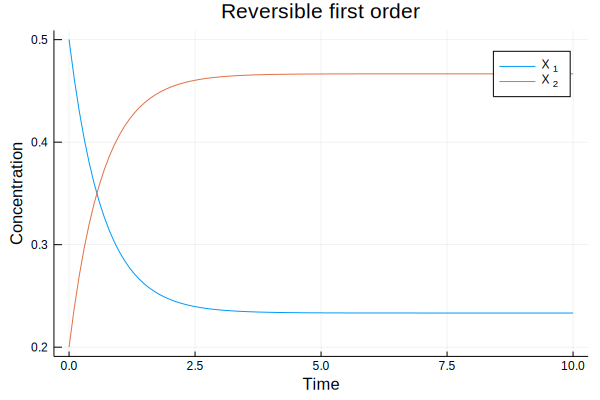

In [5]:
plot(t,t->((k_2*(X₀[1]+X₀[2]))/(k_1+k_2)) + ((k_1*X₀[1]-k_2*X₀[2])/(k_1+k_2))*exp(-t*(k_1+k_2)),label="\\ X_1",seriestype=:line)
plot!(t,t->X₀[1] + X₀[2] - ((k_2*(X₀[1]+X₀[2]))/(k_1+k_2)) - ((k_1*X₀[1]-k_2*X₀[2])/(k_1+k_2))*exp(-t*(k_1+k_2)),label="\\ X_2",seriestype=:line)
title!("Reversible first order")
xaxis!("Time")
yaxis!("Concentration")

## 3. Sequence of First Order Reactions
The next case that we can solve is the squence of first order reactions, such as:

$$X_1\overset{k_1}{\longrightarrow}X_2\overset{k_2}{\longrightarrow}X_3 \tag{38}$$


$$
A=\begin{bmatrix}
 1 & 0 & 0\\
 0 & 1 & 0\end{bmatrix} ;
B=\begin{bmatrix}
0 & 1 & 0\\
0 & 0 & 1  
\end{bmatrix} ; (B-A)^T= \begin{bmatrix}
-1 & 0\\
 1 & -1 \\
 0 & 1 \end{bmatrix} 
$$

 in this particular case

$$
K=\begin{pmatrix}
 k_1 & 0\\
 0 & k_2
\end{pmatrix}
$$


$$X^A=\begin{pmatrix}
X_1^1 \cdot X_2^0  \cdot X_3^0 \\
X_1^0\cdot X_2^1 \cdot X_3^0
\end{pmatrix} = \begin{pmatrix}
X_1\\
 X_2
\end{pmatrix}
$$

so, using the general formulation of mass action, 

$$
\begin{align}
 \begin{bmatrix}
\frac{\mathrm{d} X_1}{\mathrm{d} t}\\ \frac{\mathrm{d} X_2}{\mathrm{d} t}\\ \frac{\mathrm{d} X_3}{\mathrm{d} t} \end{bmatrix}=(B-A)^T= \begin{bmatrix}
-1 & 0\\
 1 & -1 \\
 0 & 1 \end{bmatrix} \begin{pmatrix}
 k_1 & 0\\
 0 & k_2
\end{pmatrix}\begin{pmatrix}
X_1\\
 X_2
\end{pmatrix}  =  (B-A)^T= \begin{bmatrix}
-1 & 0\\
 1 & -1 \\
 0 & 1 \end{bmatrix}\begin{pmatrix}
k_1 \cdot X_1\\
  k_2 \cdot X_2
\end{pmatrix} =   \begin{bmatrix}
- k_1 \cdot X_1 \\
k_1 \cdot X_1- k_2 \cdot X_2 \\
 k_2 \cdot X_2  \end{bmatrix}
\end{align}
$$


we will use the law of conservation of mass: 



$$ \begin{align*}
C_1 \cdot X_1 + C_2 \cdot X_2 + C_3 \cdot X_3& = cte \\
\end{align*}$$

so
$$ \begin{align*}
C \cdot (B-A)^T &=0\\ 
\begin{pmatrix}C_1 & C_2 & C_3\end{pmatrix} \begin{bmatrix}
-1 & 0\\
 1 & -1 \\
 0 & 1 \end{bmatrix}&=0\\
 -C_1 + C_2 = 0 &\implies  C_1 = C_2\\
 -C_2 + C_3 = 0 &\implies  C_2 = C_3
\end{align*}$$
Therefore,

$$ \begin{align*}
C_1 \cdot X_1(t) + C_1 \cdot X_2(t) + C_1 \cdot X_3(t)&= cte\\
\end{align*}$$

for any value of $C_1$, so taking $C_1=1$, we have 

$$X_1(t)+X_2(t)+X_3(t)=cte $$.

This constant value has to be true also at $t=0$,

$$X_1(t)+X_2(t)+X_3(t)= X_1(0)+X_2(0)+X_3(0) = cte $$.


We will assume, for simplicity, that initially we only have $X_1$ in the system, so the conservation of mass is $$X_1(t)+X_2(t)+X_3(t)=X_1(0)$$

The set of ODEs is:

$$\begin{align}
\frac{dX_1}{dt} &= -k_1 \cdot X_1 \tag{40}\\
\frac{dX_2}{dt} &= k_1 \cdot X_1  - k_2 \cdot X_2 \tag{41}\\
\frac{dX_3}{dt} &= k_2 \cdot X_2 \tag{42}\\
\end{align}$$

From the first case where we solved the first order reaction, we obtain the solution to the first equation, so we rewrite Eq. 15 using this result. We obtain: 

$$ \frac{dX_2}{dt} = k_1 \cdot X_1 (0) \cdot e^{- k_1 t}  - k_2 \cdot X_2 \tag{43}$$

Next, this equation allows us to separate variables, as 

$$ \frac{dX_2}{dt} +  k_2 \cdot X_2 = k_1 \cdot X_1 (0) \cdot e^{- k_1 t}  \tag{44}$$

Again, we need to calculate the integrating factor, $e^{ \int p(x)dx }$, which in this case is $e^{ \int k_2dt }=e^{k_2t}$. We then multiply both terms in eq. 18 by the integrating factor.

$$ \frac{dX_2}{dt}e^{k_2t} +  k_2 \cdot X_2 e^{k_2t}= k_1 \cdot X_1 (0) \cdot e^{- k_1 t}e^{k_2t}=  k_1 \cdot X_1 e^{(k_2-k_1)t}\tag{45}$$

In the next step, we need to recognize that the left-hand side of the equation is the derivative of the product of the dependent variable times the integrating factor:

$$\frac{d}{dt}\left( X_2e^{k_2t}\right)=k_1 X_1 (0) e^{(k_2-k_1)t} \tag{46}$$

We integrate

$$ \int d \left( X_2e^{k_2t}\right)=\int X_1 (0) e^{(k_2-k_1)t}dt \tag{47}$$

$$ X_2e^{k_2t}=\frac{1}{k_2-k_1} k_1 X_1 (0) e^{(k_2-k_1)t}+c \tag{48}$$

$$X_2=\frac{1}{k_2-k_1} k_1 X_1 (0) \frac{e^{(k_2-k_1)t}}{e^{k_2t}}+\frac{c}{e^{k_2t}} \tag{49}$$

$$X_2=\frac{k_1}{k_2-k_1} X_1 (0) e^{-k_1t}+ce^{-k_2t} \tag{50}$$

We have an arbitrary constant because this is a first order differential equation. Let’s calculate $c$  using the initial condition $X_2(0)=0$:

$$0=\frac{k_1}{k_2-k_1} X_1 (0) e^{-k_1 0}+ce^{-k_2 0}=\frac{k_1}{k_2-k_1} X_1 (0) + c \tag{51}$$

$$c=-\frac{k_1}{k_2-k_1} X_1 (0) \tag{52}$$

so finally we obtain the solution for $X_2$:

$$X_2(t)=\frac{k_1}{k_2-k_1}  X_1 (0) e^{-k_1t}-\frac{k_1}{k_2-k_1}  X_1 (0) e^{-k_2t} \tag{53}$$

which reorganizing terms becomes simply:

$$X_2(t)=\frac{k_1 X_1 (0)}{k_2-k_1}  \left(e^{-k_1t}-e^{-k_2t}\right) \tag{54}$$


Now that we have $X_1(t)$ and $X_2(t)$ we can get the expression for $X_3(t)$ by using simply the conservation of mass in Eq. 15

$$X_3(t)=X_1(0)-X_1(t)-X_2(t) \tag{55}$$

plugging the two solutions we obtain

$$X_3(t)=X_1(0)-X_1(0)e^{-k_1t}-\frac{k_1}{k_2-k_1} X_1(0)\left(e^{-k_1t}-e^{-k_2t}\right) \tag{56}$$

that rearranging terms becomes:

$$X_3(t)=X_1(0)\left[1-e^{-k_1t}-\frac{k_1}{k_2-k_1}\left(e^{-k_1t}-e^{-k_2t}\right)\right] \tag{57}$$

In [6]:
k_1 = 1.
k_2 = 0.5
X₀ = [0.1,0.0,0.0]

3-element Array{Float64,1}:
 0.1
 0.0
 0.0

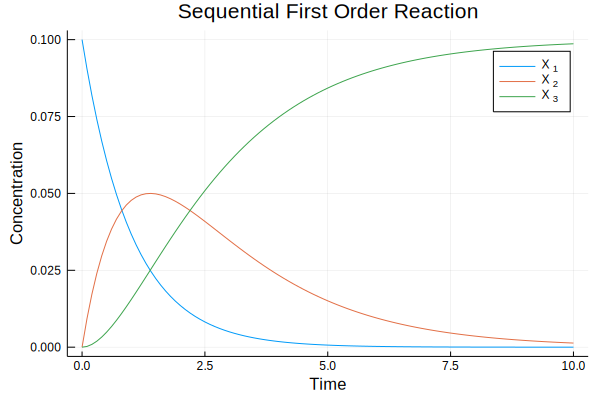

In [7]:
plot(t,t->X₀[1]*exp(-k_1*t),label="\\ X_1",seriestype=:line)
plot!(t,t->((k_1*X₀[1])/(k_2-k_1))*(exp(-k_1*t)-exp(-k_2*t)),label="\\ X_2",seriestype=:line)
plot!(t,t->X₀[1] - X₀[1]*exp(-k_1*t) - ((k_1*X₀[1])/(k_2-k_1))*(exp(-k_1*t)-exp(-k_2*t)),label="\\ X_3",seriestype=:line)
title!("Sequential First Order Reaction")
xaxis!("Time")
yaxis!("Concentration")

We can calculate the maximum of $X_2$ by differnetiating Eq. 53
$$\begin{align}
\frac{dX_2}{dt}=0 &\rightarrow   \frac{k_1 X_1 (0)}{k_2-k_1}  \left(-k_1 \cdot e^{-k_1t}+k_2 \cdot e^{-k_2t}\right) = 0 \tag{58}\\
k_1 \cdot e^{-k_1t}&=k_2 \cdot e^{-k_2t} \tag{59}\\
\frac{k_1}{k_2} \cdot e^{-k_1t}&= e^{-k_2t} \tag{60}\\
\frac{k_1}{k_2} &= \frac{e^{-k_2t}}{e^{-k_1t}}=e^{-k_2t}\cdot e^{k_1t}=e^{(k_1-k_2)t} \tag{61}
\end{align}$$

applying logs to both sides of the equation
$$(k_1-k_2)t=\log\frac{k_1}{k_2} \rightarrow t= \frac{1}{k_1-k_2}\log\frac{k_1}{k_2} \tag{62}$$

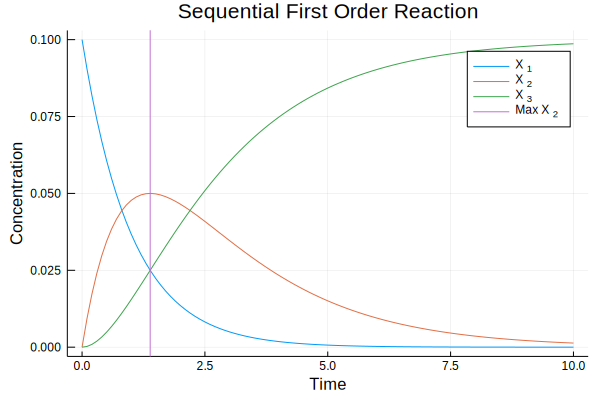

In [8]:
t_max=(1/(k_1-k_2))*log(k_1/k_2)
vline!([t_max],label="Max \\ X_2")

## 4. Second Order Reaction: 

Consider the second order reaction $$ X_1 + X_2 \overset{k}{\longrightarrow} X_3  \tag{63} $$. This corresponds to a typical example of formation of a dimer complex.

$$\begin{align}
\frac{dX_1}{dt} &= -k \cdot X_1 \cdot X_2\tag{64}\\
\frac{dX_2}{dt} &= -k \cdot X_1 \cdot X_2 \tag{65}\\
\frac{dX_3}{dt} &= k \cdot X_1 \cdot X_2 \tag{66}\\
\end{align}$$

to solve this set of ODEs, we will have to consider two separate situations $[X_1](0) \neq [X_2](0)$ and $[X_1](0) = [X_2](0)$.

### 4.1 Situation $[X_1](0) \neq [X_2](0)$

We will define `x` as the concentration of each species that have reacted at time `t`. Since both change at the same rate, we can  rewrite the expression of rate law as:

$$\begin{align}
\frac{dX_1}{dt} &= -k \cdot (X_1(0)-x) \cdot (X_2(0)-x)\tag{67}\\
\frac{dX_2}{dt} &= -k \cdot (X_1(0)-x) \cdot (X_2(0)-x) \tag{68}\\
\frac{dX_3}{dt} &= k \cdot (X_1(0)-x) \cdot (X_2(0)-x) \tag{69}
\end{align}$$

for the derivatives we can also write:

$$\begin{align}
\frac{dX_1}{dt} &=  \frac{dX_1(0)}{dt} -  \frac{dx}{dt} = -\frac{dx}{dt} \tag{70}\\
\frac{dX_2}{dt} &= \frac{dX_2(0)}{dt} -  \frac{dx}{dt} = -\frac{dx}{dt} \tag{71}
\end{align}$$

therefore, we rewrite the full set of equations in terms of `x` and the initial conditions:
$$\begin{align}
\frac{dX_1}{dt} & = -\frac{dx}{dt} = -k \cdot (X_1(0)-x) \cdot (X_2(0)-x)\tag{72}\\
\frac{dX_2}{dt} & = -\frac{dx}{dt} = -k \cdot (X_1(0)-x) \cdot (X_2(0)-x) \tag{73}\\
\end{align}$$


we can rearrange the equations as we often do:
$$\begin{align}
 \frac{dx}{(X_1(0)-x) \cdot (X_2(0)-x)} = k dt \tag{74}\\
\end{align}$$

We now integrate between  t=0(when  x=0 t= t, the time of interest.

$$\begin{align}
 \int\frac{dx}{(X_1(0)-x) \cdot (X_2(0)-x)} = k \int  dt \tag{75}\\
\end{align}$$
we separate the left part into two integrals by using the scheme:

$$\begin{align}
\frac{1}{(a-x)(b-x)}  &= \frac{A}{a-x} + \frac{B}{b-x} \tag{76}
\end{align}$$

we need to find the values for `A` and `B`, which in this case can be obtained by solving:

$$\begin{align}
A (b-x) + B (a-x) &= 1 \tag{77}\\
Ab - Ax + Ba - Bx &= 1 \tag{78}\\
(bA + Ba) - x (A + B) + &= 1 \tag{79}
\end{align}$$

this is true if $A + B=0$ and $bA + Ba=1$ so, we substitute  $B=-A$ in the second equation and obtain

$$\begin{align}
bA - Aa &= 1 \tag{80}\\
A &= \frac{1}{b-a} \tag{81}\\
B &= -\frac{1}{b-a} \tag{82}
\end{align}$$

so the equation becomes:

$$\begin{align}
\frac{1}{(a-x)(b-x)}  &= \frac{1}{b-a}(\frac{1}{a-x} + \frac{1}{b-x}) \tag{83}
\end{align}$$


applying this solution to the left side of the equation above 

$$\begin{align}
 \frac{dx}{(X_1(0)-x) \cdot (X_2(0)-x)} = \frac{1}{X_2(0)-X_1(0)}(\frac{dx}{X_1(0)-x} - \frac{dx}{X_2(0)-x})\tag{84}\\
\end{align}$$

so the equation becomes:

$$\begin{align}
 \frac{1}{X_2(0)-X_1(0)}(\int\frac{dx}{X_1(0)-x} - \int \frac{dx}{X_2(0)-x}) = k_1 \int  dt \tag{85}\\
\end{align}$$

solving 


$$\begin{align}
\frac{1}{X_2(0)-X_1(0)}\left(-\ln(X_1(0) - x) + \ln(X_2(0) - x)\right) = k_1 \, t + C \tag{86}
\end{align}$$

using the definition of `x`

$$
\dfrac{1}{X_2(0)-X_1(0)}\left(-\ln X_1 + \ln X_2 \right)=  k_1 \, t + C \tag{87}
$$

using the properties of logs

$$
\dfrac{1}{ } \ln\dfrac{X_2}{X_1}=  k_1 \, t + C \tag{88}
$$

and rearranging terms 

$$
\ln\dfrac{X_2}{X_1}= (k_1 \, t + C) (X_2(0)-X_1(0))\tag{89}
$$

to determinte C, we use the initial condition 

$$\begin{align}
\ln\dfrac{X_2(0)}{X_1(0)}= (k_1 \, 0 + C) (X_2(0)-X_1(0))\tag{90}\\
C = \dfrac{1}{X_2(0)-X_1(0)} \ln\dfrac{X_2(0)}{X_1(0)}   \tag{91}
\end{align}$$


so the final solution is
$$
\ln\dfrac{X_2 }{X_1}= (k \, t + \dfrac{1}{(X_2(0)-X_1(0))} \ln\dfrac{X_2(0)}{X_1(0)}) \, ( X_2(0)-X_1(0)) =(k \, t (X_2(0)- X_1(0)) + \ln\dfrac{X_2(0)}{X_1(0)})\tag{92}
$$
 rearranging terms
 
 $$
\dfrac{X_2 }{X_1 }= e^{(k \, t ( X_2(0)-X_1(0)) + \ln\dfrac{X_2(0)}{X_1(0)})}=e^{(k \, t ( X_2(0)-X_1(0))}  e^{\ln\dfrac{X_2(0)}{X_1(0)})}\tag{93}
$$

In conclusion, in this simple second order reaction, we cannot calculate analitically $X_1$ and $X_2$, just a relation between them 

$$
\dfrac{X_2}{X_1}= \dfrac{X_2(0)}{X_1(0)} e^{k \, t \, (X_2(0)- X_1(0))} \tag{94}
$$


### 4.2 Situation $[X_1](0) = [X_2](0)$

Since $X_1$ and $X_2$  react 1 to 1, allways the concetration of $X_1=X_2 $, therefore, we can use the same solution as in the previous second order reaction.

$$\text{rate} = k[X_1][X_2] = k[X_1][X_1] = k[X_1]^2 \tag{95}$$

The equations are simply:
$$
\begin{align}
\dfrac{d[X_1]}{dt} = -  k_1\,[X_1]^2 \tag{96}\\
\dfrac{d[X_2]}{dt} =  -  k_1\,[X_1]^2 \tag{97}\\
\dfrac{d[X_3]}{dt} =  k_1\,[X_1]^2 \tag{98}
\end{align}$$

The conservation of mass is now $ X_1 (t)+X_2 (t) + 2 X_3 (t) = 2 X_1 (t) + 2 X_3 (t) = 2 X_1 (0) + 2 X_3 (0) $. Taking eq. 2, we reorganize variables and integrate.

$$\begin{align*}
   \frac{\mathrm{d} X_1}{X_1^2} &=  - k_1 \mathrm{d}t \tag{99}\\
   \int  \frac{\mathrm{d} X_1}{X_1^2} &=  \int  - k_1 \mathrm{d}t \tag{100}\\
     \frac{-1}{X_1} &=  - k_1 t + C \tag{101}\\
     X_1(t) &=\frac{1}{k_1   t - C}  \tag{102}\\
\end{align*}$$

To calculate the integration constant, we use the intial condition at $t=0$.

$$\begin{align*}
     X_1(0) &=\frac{1}{k_1   0 - C} = - \frac{1}{C} \tag{103}
\end{align*}$$


so the final equation of is
$$\begin{align}
X_1(t) &=\frac{1}{k_1  t + \frac{1}{X_1(0)} } \tag{104}
\end{align}$$
so, multiplying numerator and denominator of the right side of the equation by $X_1(0)$ we obtain
$$\begin{align}
X_1(t) &=\frac{X_1(0)}{(X_1(0))( k_1  t  + \frac{1}{X_1(0)}) }= \frac{X_1(0)}{k_1 X_1(0)t + 1}\tag{105}
\end{align}$$

taking the conservation of mass we have:

$$\begin{align}
X_3(t) &= X_3 (0) + 2 X_1 (0) -  \frac{X_1(0)}{k_1 X_1(0)t + 1}=X_3 (0) +  X_1 (0) (1- \frac{1}{k_1 X_1(0)t + 1})\tag{106}
\end{align}$$


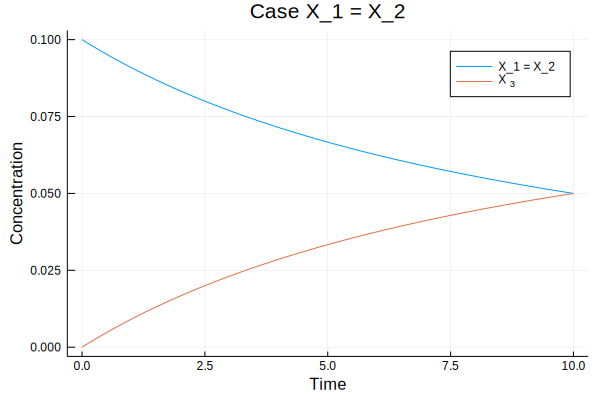

In [9]:
k_1 = 1.
X₀ = [0.1,0.1,0.]
plot(t,t->X₀[1]/((k_1*t*X₀[1])+1),label=" X_1 = X_2")
plot!(t,t->X₀[3]+X₀[1]*(1-1/((k_1*t*X₀[1])+1)),label="\\ X_3 ")
title!("Case  X_1  =  X_2 ")
xaxis!("Time")
yaxis!("Concentration")

## 5. Second order reaction: Dimerization 

A special case of second order reaction is when conversion into product occur in pairs. We derive the solution for dimers, where two identical molecules interact to form a complex to then be converted to another molecule. The scheme of interaction is the following:

$$ 2X_1 \overset{k_1}{\longrightarrow} 2X_2  \tag{107} $$ 

with initial conditions $X_1(0)$ and $X_2(0)$, and conservation of mass:

$$X_1(t)+X_2(t)=X_1(0)+X_2(0)  \tag{108}$$

$$
\begin{align*}
   \frac{\mathrm{d} X_1}{\mathrm{d} t} &=  - 2 k_1 X_1^2 \tag{109}\\
   \frac{\mathrm{d} X_2}{\mathrm{d} t} &=   2 k_1 X_1^2  \tag{110}\\
\end{align*}
$$

It is called a second order reaction because the rate is proportional to the second power of the concentration of reactant. Taking eq. 65, we reorganize variables and integrate.
$$\begin{align*}
   \frac{\mathrm{d} X_1}{X_1^2} &=  - 2k_1 \mathrm{d}t \tag{111}\\
   \int  \frac{\mathrm{d} X_1}{X_1^2} &=  \int  - 2k_1 \mathrm{d}t \tag{112}\\
     \frac{-1}{X_1} &=  - 2k_1 t + C \tag{113}\\
     X_1(t) &=\frac{1}{2k_1   t - C}  \tag{114}\\
\end{align*}$$

To calculate the integration constant, we use the intial condition at $t=0$.

$$\begin{align*}
     X_1(0) &=\frac{1}{2k_1   0 - C} = - \frac{1}{C} \tag{115}
\end{align*}$$


so the final equation of is
$$\begin{align}
X_1(t) &=\frac{1}{2k_1  t + \frac{1}{X_1(0)} } \tag{116}
\end{align}$$
so, multiplying numerator and denominator of the right side of the equation by $X_1(0)$ we obtain
$$\begin{align}
X_1(t) &=\frac{X_1(0)}{(X_1(0))(2 k_1  t  + \frac{1}{X_1(0)}) }= \frac{X_1(0)}{2k_1 X_1(0)t + 1}\tag{117}
\end{align}$$
so using the mass conservation we obtain for $X_2$:
$$\begin{align}
X_2(t) &= X_1(0)+X_2(0) - \frac{X_1(0)}{2k_1 X_1(0)t + 1}\tag{118}\\
X_2(t) &= X_2(0) + X_1(0) (1 - \frac{1}{2k_1 X_1(0)t + 1})\tag{119}\\
X_2(t) &= X_2(0) + X_1(0) \frac{2k_1 X_1(0)t}{2k_1 X_1(0)t + 1}\tag{120}\\
X_2(t) &= X_2(0) +  \frac{2k_1 X_1(0)^2 t}{2k_1 X_1(0)t + 1}\tag{121}\\
\end{align}$$

Now we can compare the conversions of monomers versus dimers.

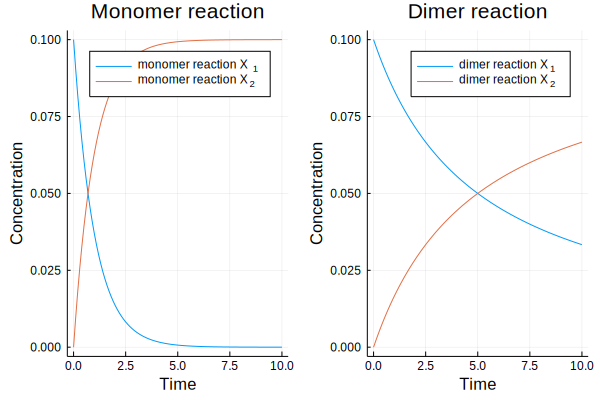

In [10]:
X₀ = [0.1,0.0]
k_1 = 1.
P1=plot(t,t->X₀[1]*exp(-k_1*t),label="monomer reaction \\  X_1",seriestype=:line)
P1=plot!(t,t->X₀[2]+X₀[1]*(1-exp(-k_1*t)),label="monomer reaction \\ X_2",seriestype=:line)
title!("Monomer reaction")
P2=plot(t,t->X₀[1]/((2*k_1*t*X₀[1])+1),label="dimer reaction \\ X_1 ")
P2=plot!(t,t->X₀[2]+(2*k_1*t*X₀[1]^2)/((2*k_1*t*X₀[1])+1),label="dimer reaction \\ X_2 ")
title!("Dimer reaction")


plot(P1,P2,layout=(1,2),legend=true)

xaxis!("Time")
yaxis!("Concentration")

## Open systems

Despite being developed in the context of closed chemical systems, the mass action law is also applicable to open systems, i.e., systems where tehre is mop consevarion of mass. This is very relevanty for biological systems, since they are often an open system that ecxchanges mass with the environment. A first example of an open system is when a given reactant is degraded or flows away, for instance:
$$   X_1  \overset{k_1}{\longrightarrow} 0 \tag{121} $$ 

In this case, the system is described by a single first order differential equation that is equivalent to eq. 3 in this notebook. 

 $$\frac{\mathrm{d} X_1}{\mathrm{d} t} =  - k_1 X_1 \tag{122}$$ with a solution
 
 $$ X_1 (t)= X_1 (0) e^{- k_1 t}  \tag{123}$$
 
 

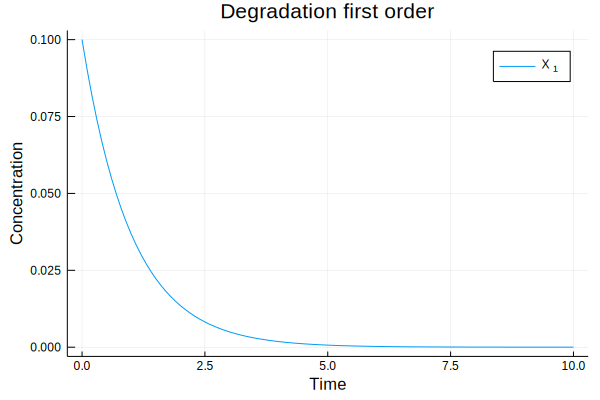

In [11]:
X₀ = [0.1,0.0]
k_1 = 1.
plot(t,t->X₀[1]*exp(-k_1*t),label="\\ X_1")
title!("Degradation first order")
xaxis!("Time")
yaxis!("Concentration")

Another simple example is the generation of a given reactant in the system, such as:
$$   0  \overset{k_1}{\longrightarrow} X_1 \tag{124} $$ 

For this particular scheme, the corresponding differential equation is simply:

 $$\frac{\mathrm{d} X_1}{\mathrm{d} t} =  k_1 \tag{125}$$ wich when we integrate we obtain the following solution:
 
$$\begin{align}
\int \mathrm{d} X_1 &= \int k_1  \mathrm{d} t  \tag{126}\\
 X_1(t) &=  k_1  \cdot t + C \tag{122}
\end{align} $$

again, to calculate the constant $C$ we use the initial condition for $t=0$, so $ X_1(0)=C$. Therefore:
$$ X_1(t) =  k_1  \cdot t + X_1(0) \tag{127}$$ 
which shows that the amount of $X_1$ grows linearly with $t$.

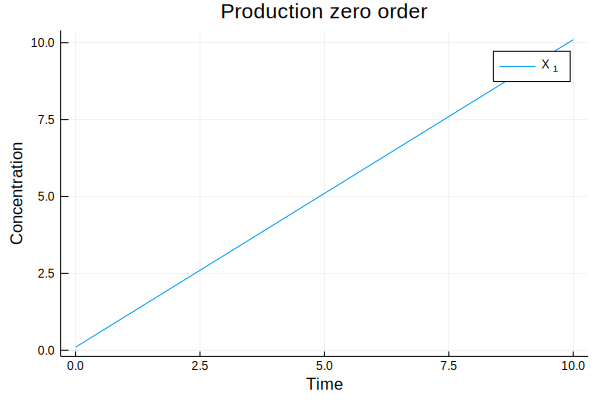

In [12]:
plot(t,t->X₀[1]+k_1*t,label="\\ X_1")
title!("Production zero order")
xaxis!("Time")
yaxis!("Concentration")

Next we will this solution with two reactions that look similar in terms of the reaction kinetics and equilibrium, but they are quite different in terms of their dynamics. 

$$   X_1  \overset{k_1}{\longrightarrow} 2 X_1 \tag{128} $$ 

with this one

$$   2X_1  \overset{k_1}{\longrightarrow} 3 X_1 \tag{129} $$ 

in both reactions, the reaction produces a new molecule of $X_1$ but when we write the differential equations we have:

 $$\frac{\mathrm{d} X_1}{\mathrm{d} t} =  k_1 \cdot X_1 \tag{130}$$  
 
 for the first reaction, while the second one produces:
 
 $$\frac{\mathrm{d} X_1}{\mathrm{d} t} =  - 2 k_1 \cdot X_1^2 + 3 k_1 \cdot X_1^2 = k_1 \cdot X_1^2 \tag{131}$$ 
 
 We know the solution when we integrate the first one:
 
  $$ X_1 (t)= X_1 (0) \cdot e^{k_1 t}  \tag{132}$$
 
withe the second one is :

$$\begin{align}
\int \mathrm{d} X_1^{-2} &=  \int k_1 \cdot \mathrm{d}t \tag{133} \\
-X_1^{-1} &=  k_1  t + C \tag{12}\\
X_1(t) &=\frac{-1}{k_1  t + C}  \tag{134}
\end{align}$$

using the intial condition of $X_1(t=0)$ we obtain the value of the integration constant. 
$$\begin{align}
X_1(0) &=\frac{-1}{k_1  0 + C} = \frac{-1}{C}  \tag{135}\\
C &= \frac{-1}{X_1(0)}  \tag{131}\\
\end{align}$$

so the final equation of is
$$\begin{align}
X_1(t) &=\frac{-1}{k_1  t - \frac{1}{X_1(0)} } \tag{136}
\end{align}$$
so, multiplying numerator and denominator of the right side of the equation by $-X_1(0)$ we obtain
$$\begin{align}
X_1(t) &=\frac{(-1)\cdot(-X_1(0))}{(-X_1(0))(k_1  t  - \frac{1}{X_1(0)}) }= \frac{X_1(0)}{(1-X_1(0)k_1 t)}\tag{137}
\end{align}$$

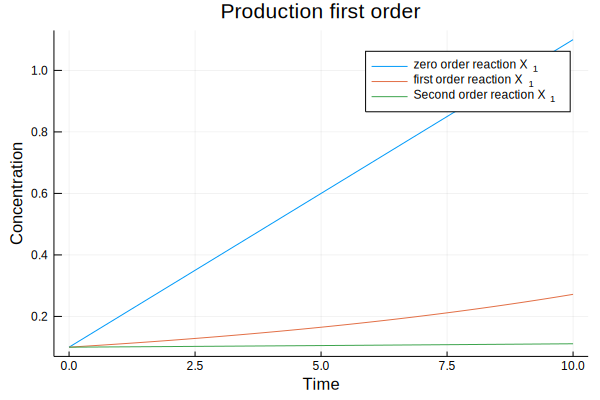

In [13]:
X₀ = [0.1,0.0]
k_1 = 0.1
plot(t,t->X₀[1]+k_1*t,label="\\ zero order reaction \\ X_1 ")
plot!(t,t->X₀[1]*exp(k_1*t),label=" first order reaction \\ X_1 ")
plot!(t,t->X₀[1]/(1-k_1*t*X₀[1]),label=" Second order reaction \\ X_1 ")
title!("Production  first order")
xaxis!("Time")
yaxis!("Concentration")

We can see that, despite being similar in terms of the production of molecules of $X_1$ per reaction, the dynamics of zero first and second order reactions are completely different, even when using identical parameter values.